In [1]:
from face_alignment import FaceAlignment, LandmarksType

from loreal_poc.datasets.dataset_300W import Dataset300W
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.models.face_alignment import FaceAlignmentModel
from loreal_poc.tests.performance import test_me, test_nme

Benchmark

In [2]:
ds = Dataset300W(dir_path="300W/sample")

L'Oreal

In [3]:
model = FaceAlignmentModel(model=FaceAlignment(LandmarksType.TWO_D, device="cpu", flip_input=False))

In [4]:
print(test_me(model, ds))
print(test_nme(model, ds))

TestResult(name='Mean Euclidean Distance (ME)', metric=12.496953183186655, passed=False)
TestResult(name='Normalized Mean Euclidean Distance (NME)', metric=0.06321234461079239, passed=False)


In [5]:
chosen_idx = 4
image = ds.all_images[chosen_idx]
ground_truth_landmarks = ds.all_marks[chosen_idx, : ,:]
predictions = model.predict(ds)
loreal_landmarks = predictions[chosen_idx]

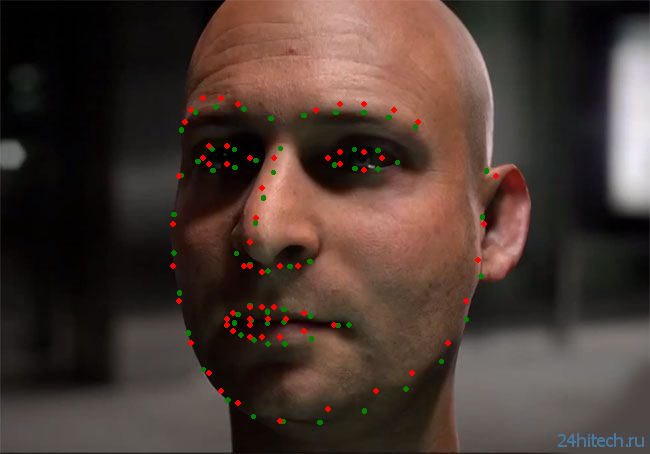

In [6]:
draw_marks(image, [ds.all_marks[chosen_idx, : ,:], loreal_landmarks], ["green", "red"])